<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import numpy as np
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import PIL.Image as image
%matplotlib inline
import cv2 as cv

In [ ]:
impnplabel = np.array([0,1,2,3,4,5,6,7,8,9,5,2,2,3,4,5,6])

In [ ]:
impnplabel = tf.keras.utils.to_categorical(impnplabel,10)

In [ ]:
impnplabel

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

<class 'numpy.ndarray'>


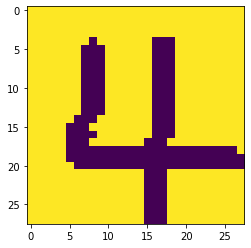

In [594]:
cv_img = []
path = glob.glob("number11/04.png")
for img in path:
    n = cv.imread(img,cv.IMREAD_COLOR)
    ngray = cv.cvtColor(n, cv.COLOR_BGR2GRAY)
    cv_img.append(ngray)
    # gray = lambda n : np.dot(n[... , :3] , [0.299 , 0.587, 0.114])
    print(type(ngray))
    plt.imshow(ngray)
    imgnp = np.array(ngray)
    imgnp = imgnp.reshape(1,28,28)
    imgnp = imgnp/255.0
impnplabel = np.array([0,1,2,3,4,5,6,7,8,9,5,2,2,3,4,5,6])
impnplabel = tf.keras.utils.to_categorical(impnplabel,10)

In [161]:
mnist = tf.keras.datasets.mnist #MNIST셋을 불러옴 . 

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1) # MNIST는 흑백이기때문에 1을추가.
x_test = x_test.reshape(10000,28,28,1)
# x_train = x_train/255.0 # 0~1 까지 값을 MIN--MAX 정규화를 함 .
# x_test = x_test/255.0

# 레이블 값 원-핫 인코딩.
y_test1 = tf.keras.utils.to_categorical(y_test,10) 
y_train1 = tf.keras.utils.to_categorical(y_train,10)

In [536]:

second = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')
])

second.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [552]:
second.fit(x_train,y_train,epochs = 5, batch_size = 128 )

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3442 - accuracy: 0.9039
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3167 - accuracy: 0.9121
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2995 - accuracy: 0.9163
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2713 - accuracy: 0.9241
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2634 - accuracy: 0.9266


In [553]:
cnn.evaluate(imgnp,impnplabel, batch_size= 1)

ValueError: ignored

In [595]:
a= second.predict(imgnp)
a

array([[0.13556847, 0.03633999, 0.07296419, 0.07602403, 0.03231082,
        0.0620628 , 0.06710032, 0.0412875 , 0.3952748 , 0.08106704]],
      dtype=float32)

In [596]:
np.argmax(a)

8

In [452]:
prex = cnn.predict(x_test[1].reshape(1,28,28,1))

In [506]:
np.argmax(a1)

3

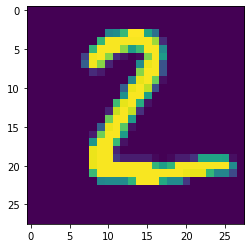

In [482]:
plt.imshow(np.squeeze(x_test[1],2))

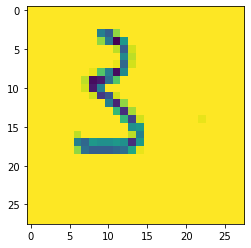

In [408]:
plt.imshow(np.squeeze(imgnp[1],2))

In [188]:
print(imgnp.shape) # 해상도, 컬러
print(imgnp.size) # 사이즈 (byte)
print(imgnp.dtype) #데이터 타입

(17, 28, 28, 1)
13328
float64


In [189]:
print(x_test.shape) # 해상도, 컬러
print(x_test.size) # 사이즈 (byte)
print(x_test.dtype) #데이터 타입

(10000, 28, 28, 1)
7840000
uint8
